# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [10]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [11]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(125407, 122)

In [12]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(125407, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [15]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,False
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [16]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    0.004159
TARGET                        1.000000
NAME_CONTRACT_TYPE           -0.031744
FLAG_OWN_CAR                 -0.021863
FLAG_OWN_REALTY              -0.005491
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.003120
AMT_REQ_CREDIT_BUREAU_MON    -0.012593
AMT_REQ_CREDIT_BUREAU_QRT    -0.003966
AMT_REQ_CREDIT_BUREAU_YEAR    0.018277
DAYS_EMPLOYED_ANOM           -0.045798
Name: TARGET, Length: 110, dtype: float64

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [23]:
app_train.corr().sort_values("TARGET",inplace=False).head(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
EXT_SOURCE_3,-0.005760,-0.177577,-0.008102,-0.015094,0.035262,-0.045152,-0.023103,0.046933,0.033337,0.051485,...,-0.000362,-0.013665,-0.012861,-0.000196,-0.005964,-0.023628,-0.009203,-0.029715,-0.071759,0.115537
EXT_SOURCE_2,-0.001527,-0.163694,0.019030,0.052602,0.002882,-0.013857,0.037758,0.133932,0.126930,0.142745,...,0.001657,0.000031,-0.004859,-0.005603,0.001444,0.005129,0.050520,-0.004631,-0.017573,-0.019782
EXT_SOURCE_1,-0.007110,-0.155526,-0.012112,-0.053852,0.078527,-0.141577,0.017717,0.167363,0.117580,0.174641,...,0.007655,-0.006060,-0.020704,-0.010473,-0.005017,-0.007984,0.031152,-0.008979,0.012026,0.293615
DAYS_BIRTH,-0.000683,-0.078279,-0.087508,-0.125236,0.119975,-0.331961,-0.020139,0.057567,-0.008845,0.055822,...,-0.002030,-0.008678,-0.025566,-0.008724,-0.004762,-0.000980,0.000031,0.014888,0.072742,0.619646
FLOORSMAX_AVG,-0.004776,-0.046968,0.031793,0.052466,0.001723,-0.010081,0.040451,0.101320,0.127628,0.106660,...,0.000323,-0.007152,-0.005665,0.006481,0.003058,-0.002087,0.043287,-0.010258,-0.015307,-0.017878
FLOORSMAX_MEDI,-0.004808,-0.046674,0.031837,0.051913,0.002024,-0.009767,0.040116,0.100450,0.126430,0.105711,...,0.000519,-0.007069,-0.005757,0.006307,0.003015,-0.001882,0.041899,-0.009831,-0.015154,-0.017807
DAYS_EMPLOYED_ANOM,0.002659,-0.045798,-0.052633,-0.151811,0.066405,-0.241514,-0.044840,-0.065644,-0.105565,-0.062889,...,-0.010593,-0.010003,-0.008251,-0.006947,0.000153,-0.000643,-0.032835,0.018848,0.050217,1.000000
FLOORSMAX_MODE,-0.004309,-0.045680,0.030357,0.051950,0.003454,-0.010193,0.038805,0.098439,0.123952,0.103670,...,0.000006,-0.006537,-0.006310,0.006400,0.003014,-0.001178,0.040380,-0.008877,-0.014374,-0.016868
REGION_POPULATION_RELATIVE,0.001494,-0.040257,0.032344,0.037586,0.014135,-0.024086,0.050047,0.099075,0.118101,0.103565,...,-0.000283,-0.002003,0.000562,-0.005051,-0.000215,-0.003679,0.079420,-0.008234,0.003140,-0.005048
AMT_GOODS_PRICE,-0.000796,-0.039594,-0.185681,0.121229,-0.044843,-0.001425,0.110747,0.986973,0.776645,1.000000,...,0.020377,0.027153,-0.011373,-0.002116,0.004184,-0.000762,0.059735,0.020958,-0.049078,-0.062889


In [24]:
app_train.corr().sort_values("TARGET",inplace=False).tail(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
DEF_30_CNT_SOCIAL_CIRCLE,0.000430,0.032377,-0.010551,-0.017416,0.012412,-0.002808,-0.011005,-0.018519,-0.023467,-0.019563,...,-0.002006,0.002561,0.000444,-0.001621,0.001924,-0.003976,0.000377,-0.003014,0.016349,0.023617
DEF_60_CNT_SOCIAL_CIRCLE,0.001478,0.033583,-0.007566,-0.016833,0.012412,-0.002848,-0.010412,-0.022239,-0.024716,-0.022883,...,-0.000403,0.002162,0.000166,-0.003673,0.000882,-0.003082,-0.000837,-0.001122,0.016127,0.017508
LIVE_CITY_NOT_WORK_CITY,-0.001974,0.035639,-0.005993,0.085650,-0.030816,0.070635,0.004268,0.000777,0.010052,-0.000858,...,-0.004606,0.004327,0.001211,-0.000998,-0.002989,0.000496,-0.007692,-0.008069,-0.013234,-0.218283
DAYS_REGISTRATION,-0.000452,0.039039,0.024486,0.084791,-0.025378,0.182728,0.017989,0.006234,0.036985,0.008859,...,0.003147,0.006530,0.003797,-0.000976,-0.000215,0.001248,-0.012029,-0.002608,-0.026084,-0.211447
REG_CITY_NOT_LIVE_CITY,-0.006069,0.039655,0.016330,0.002890,-0.061213,0.020076,0.002012,-0.025469,-0.006667,-0.025652,...,-0.004711,-0.004248,-0.001782,0.002814,-0.000924,0.001584,-0.014790,-0.001820,-0.001949,-0.094592
OWN_CAR_AGE,0.007475,0.042438,0.007146,NaN,0.000870,0.012867,-0.133288,-0.091980,-0.097423,-0.101569,...,-0.004942,-0.007919,-0.002442,0.008852,-0.000068,0.012616,-0.019307,-0.014859,-0.013153,0.021931
FLAG_EMP_PHONE,-0.002654,0.045760,0.052674,0.151633,-0.066269,0.241454,0.044814,0.065534,0.105477,0.062776,...,0.010596,0.010006,0.008252,0.006673,-0.000145,0.000663,0.032815,-0.018873,-0.050180,-0.999811
FLAG_DOCUMENT_3,0.000893,0.046020,-0.482362,-0.070553,-0.034905,0.056123,-0.012051,0.092273,0.099042,0.070769,...,0.007630,0.006488,-0.025742,-0.000251,0.000189,0.009299,0.012856,0.013500,0.048887,-0.246882
REG_CITY_NOT_WORK_CITY,-0.004947,0.051865,0.004970,0.074346,-0.057915,0.070692,0.002810,-0.018445,-0.000106,-0.019923,...,-0.005636,0.002715,0.001092,0.001998,-0.002139,0.001532,-0.014025,-0.008837,-0.011258,-0.255905
DAYS_ID_PUBLISH,-0.000271,0.052407,0.052677,0.009368,0.009650,-0.027629,0.005121,-0.012718,0.008671,-0.015233,...,-0.001196,0.003189,0.013754,0.005442,0.006121,0.001706,-0.006813,-0.010840,-0.035724,-0.271662


In [35]:
app_train['EXT_SOURCE_3']

0         0.139376
1              NaN
2         0.729567
3              NaN
4              NaN
            ...   
125402    0.669057
125403    0.577969
125404         NaN
125405    0.499272
125406    0.177704
Name: EXT_SOURCE_3, Length: 125407, dtype: float64

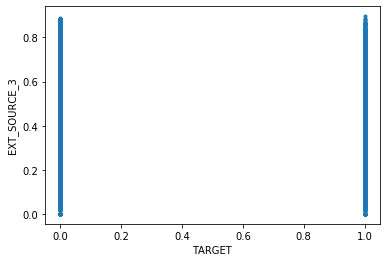

In [28]:
plt.plot(app_train['TARGET'], app_train['EXT_SOURCE_3'], '.')
plt.xlabel('TARGET')
plt.ylabel('EXT_SOURCE_3')
plt.show()

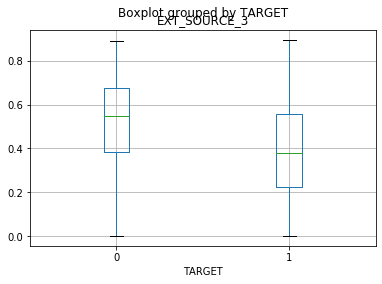

In [33]:
app_train.boxplot(by='TARGET', column='EXT_SOURCE_3')